## Kaggle Titanic Dataset - Prediction of Survival

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set working directory to the location of the data files
import os
os.chdir('C:/Users/Nissim/Desktop/Spring 2023/Remote Sensing/MUSA-650_Spring2023/Week02/Data')

### Read Data

In [5]:
dfTR = pd.read_csv('./train.csv')
dfTR.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
## Show dataframe info
dfTR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
## Show dataframe description
dfTR.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Clean Data

In [10]:
## Show dataframe null counts
dfTR.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
dfTR.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
dfTR.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
## Select columns
SEL_COLS = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
dfTR = dfTR[SEL_COLS]
dfTR.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
## Drop NAs
dfTR = dfTR.dropna()
dfTR.shape

(712, 8)

In [16]:
## View distributions
SEL_VAR = SEL_COLS[0]                  ## Change index for other variables
dfTR.groupby(SEL_VAR).count()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0,424,424,424,424,424,424,424
1,288,288,288,288,288,288,288


In [17]:
## view distributions of categorical variables by survival
for i in range(1, len(SEL_COLS)):
    SEL_VAR = SEL_COLS[i]              ## Change index for other variables
    print(dfTR.groupby([SEL_VAR, 'Survived']).count())

                 Sex  Age  SibSp  Parch  Fare  Embarked
Pclass Survived                                        
1      0          64   64     64     64    64        64
       1         120  120    120    120   120       120
2      0          90   90     90     90    90        90
       1          83   83     83     83    83        83
3      0         270  270    270    270   270       270
       1          85   85     85     85    85        85
                 Pclass  Age  SibSp  Parch  Fare  Embarked
Sex    Survived                                           
female 0             64   64     64     64    64        64
       1            195  195    195    195   195       195
male   0            360  360    360    360   360       360
       1             93   93     93     93    93        93
                Pclass  Sex  SibSp  Parch  Fare  Embarked
Age   Survived                                           
0.42  1              1    1      1      1     1         1
0.67  1              1  

### Visualize Data

   #### Survival counts

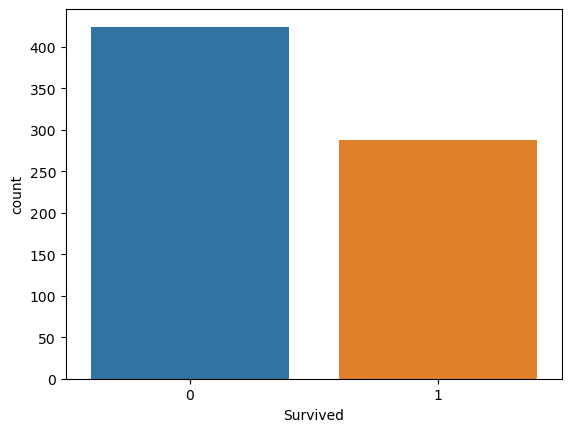

In [18]:
sns.countplot(data = dfTR, x='Survived')
plt.show()

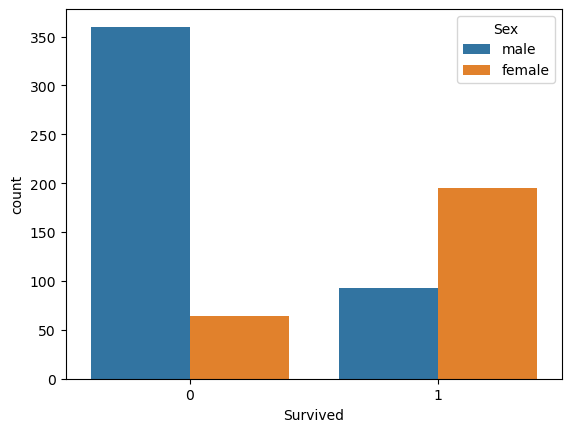

In [19]:
sns.countplot(data=dfTR, x='Survived', hue='Sex')
plt.show()

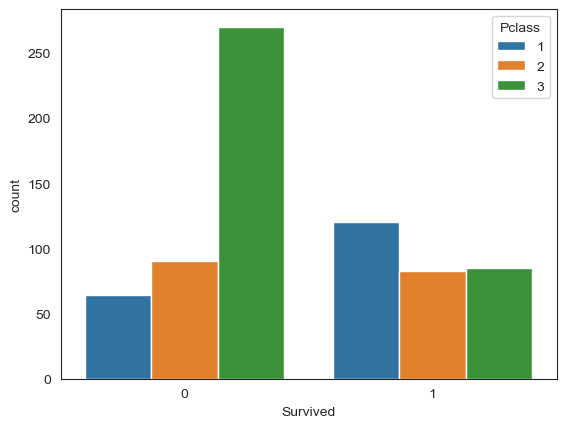

In [20]:
sns.set_style('white')
sns.countplot(data=dfTR, x='Survived', hue='Pclass')
plt.show()

   #### Age of the passengers

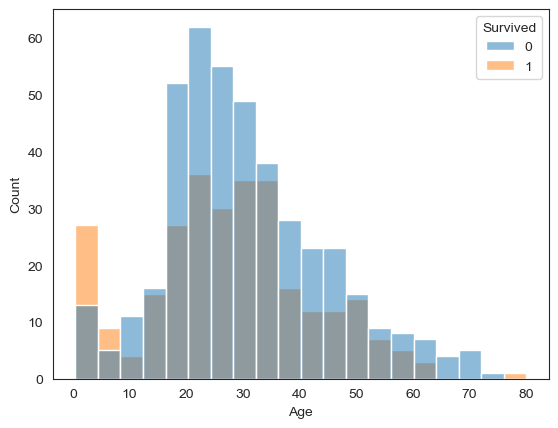

In [22]:
sns.histplot(data=dfTR, x='Age', hue = 'Survived')
plt.show()

#### Siblings and Spouse count

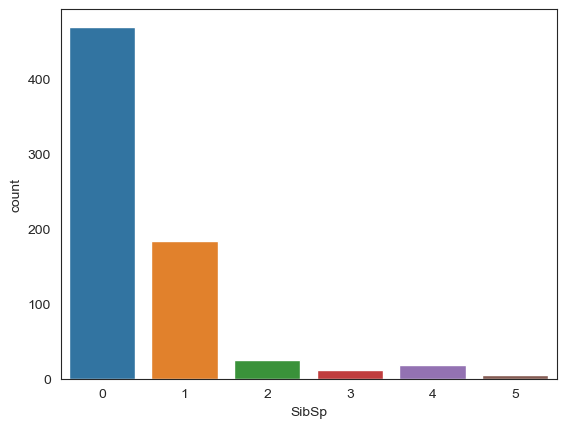

In [23]:
sns.countplot(data=dfTR, x='SibSp')
plt.show()

#### Distribution of Fares

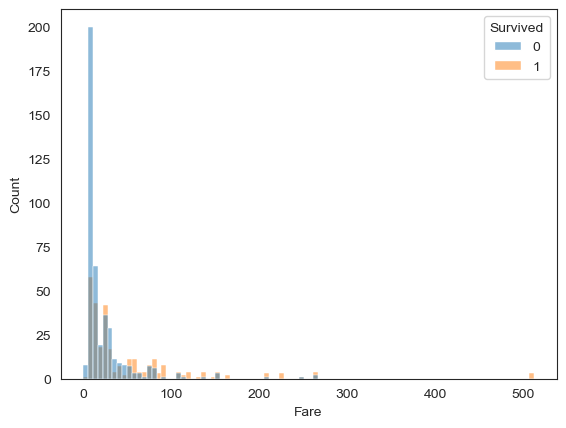

In [30]:
sns.histplot(data=dfTR, x='Fare', hue = 'Survived')
plt.show()

### Handle Categorical Variables

In [31]:
dfSex = pd.get_dummies(dfTR['Sex'], prefix='Sex', drop_first=True)
dfSex.head()

KeyError: 'Sex'

In [27]:
dfEmb = pd.get_dummies(dfTR['Embarked'], prefix='Emb', drop_first=True)
dfEmb.head()

,Emb_Q,Emb_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [33]:
dfTR=pd.concat([dfTR.drop(['Sex','Embarked'],axis=1), dfSex, dfEmb], axis=1)
dfTR.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Emb_Q,Emb_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### ML Models for Prediction

### Scale the data

In [34]:
from sklearn.preprocessing import StandardScaler
scalerTR = StandardScaler()

In [35]:
XTR = np.array(dfTR[dfTR.columns[1:]])
XTR.shape

(712, 8)

In [36]:
YTR = np.array(dfTR[dfTR.columns[0:1]]).squeeze()
YTR.shape

(712,)

In [39]:
scalerTR.fit(XTR)
XTRNorm = scalerTR.transform(XTR)

### Version 1: Train - Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(XTRNorm, YTR, test_size = 0.3, random_state = 101)

### 1. Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression()

In [42]:
mdl.fit(X_train,Y_train)

LogisticRegression()

In [43]:
pred = mdl.predict(X_test)
pred

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [44]:
Y_test

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
print(accuracy_score(Y_test,pred))

0.794392523364486


In [47]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       128
           1       0.76      0.72      0.74        86

    accuracy                           0.79       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



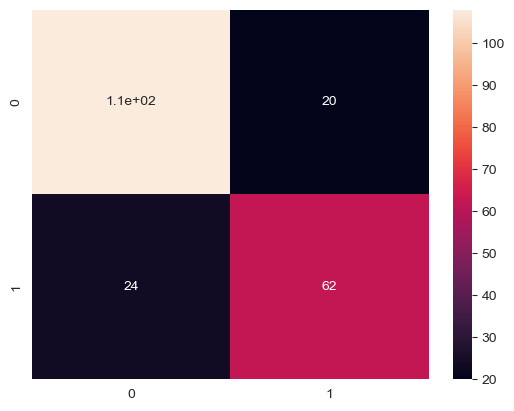

In [48]:
sns.heatmap(confusion_matrix(Y_test,pred), annot=True)
plt.show()

### 2. K-Nearest Neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=1)

In [51]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
knnpredict = knn.predict(X_test)
knnpredict

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [53]:
print(accuracy_score(Y_test,knnpredict))

0.719626168224299


In [54]:
print(classification_report(Y_test,knnpredict))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       128
           1       0.64      0.69      0.66        86

    accuracy                           0.72       214
   macro avg       0.71      0.71      0.71       214
weighted avg       0.72      0.72      0.72       214



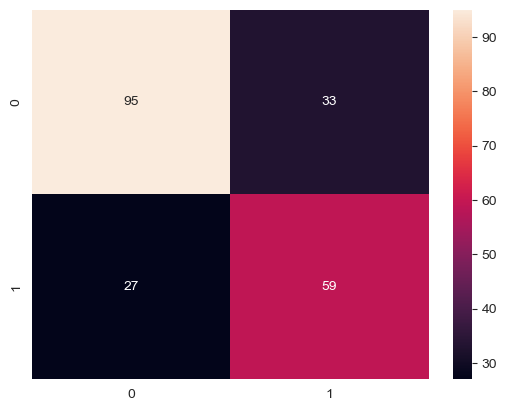

In [55]:
sns.heatmap(confusion_matrix(Y_test,knnpredict),annot=True)
plt.show()

### 3 - Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtree = DecisionTreeClassifier()

In [58]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [59]:
treepredict = dtree.predict(X_test)
treepredict

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [60]:
print(accuracy_score(Y_test,treepredict))

0.7523364485981309


In [61]:
print(classification_report(Y_test,treepredict))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       128
           1       0.69      0.71      0.70        86

    accuracy                           0.75       214
   macro avg       0.74      0.75      0.74       214
weighted avg       0.75      0.75      0.75       214



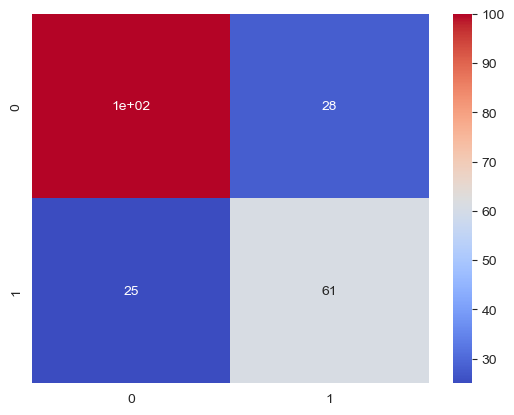

In [62]:
sns.heatmap(confusion_matrix(Y_test,treepredict),cmap='coolwarm',annot=True)
plt.show()

### 4 - Random Forest

### <center> 4.1 Random Forest with 10 estimators

In [105]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 10)
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

In [106]:
rfcpredict_10 = rfc.predict(X_test)
rfcpredict_10

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [107]:
print(accuracy_score(Y_test,rfcpredict_10))

0.780373831775701


In [108]:
print(classification_report(Y_test,rfcpredict_10))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       128
           1       0.75      0.67      0.71        86

    accuracy                           0.78       214
   macro avg       0.77      0.76      0.77       214
weighted avg       0.78      0.78      0.78       214



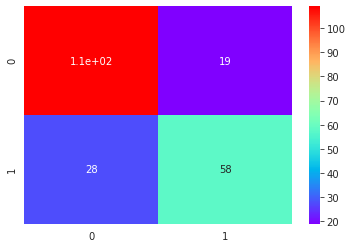

In [109]:
sns.heatmap(confusion_matrix(Y_test,rfcpredict_10),cmap='rainbow',annot=True)
plt.show()

### <center> 4.2 Random Forest with 100 estimators

In [110]:
rfc_100 = RandomForestClassifier(n_estimators=100)
rfc_100.fit(X_train,Y_train)

RandomForestClassifier()

In [111]:
rfcpredict_100 = rfc_100.predict(X_test)
rfcpredict_100

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [112]:
print(accuracy_score(Y_test,rfcpredict_100))

0.7757009345794392


In [113]:
print(classification_report(Y_test,rfcpredict_100))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       128
           1       0.73      0.71      0.72        86

    accuracy                           0.78       214
   macro avg       0.77      0.76      0.77       214
weighted avg       0.77      0.78      0.78       214



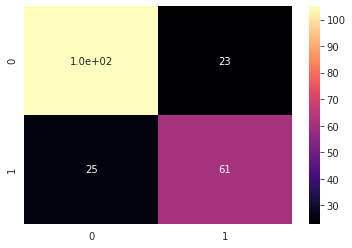

In [114]:
sns.heatmap(confusion_matrix(Y_test,rfcpredict_100),annot= True, cmap='magma')
plt.show()

### 5 - Support Vector Machines

In [115]:
from sklearn.svm import SVC

In [116]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [117]:
svc_predict = svc.predict(X_test)
svc_predict

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [118]:
print(accuracy_score(Y_test,svc_predict))

0.8037383177570093


In [119]:
print(classification_report(Y_test,svc_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       128
           1       0.78      0.71      0.74        86

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



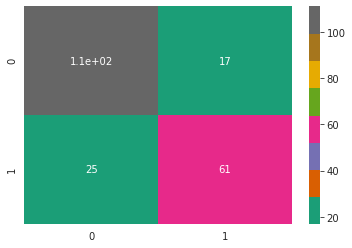

In [120]:
sns.heatmap(confusion_matrix(Y_test,svc_predict),cmap='Dark2',annot=True)
plt.show()